In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [257]:
wine_qua = pd.read_csv("winequality-red.csv")
wine_qua

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [259]:
wine_qua.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [261]:
wine_qua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [263]:
wine_qua.shape

(1599, 12)

In [265]:
wine_qua.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [267]:
wine_qua.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [269]:
wine_qua['fixed acidity'].value_counts()

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64

In [271]:
wine_qua['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

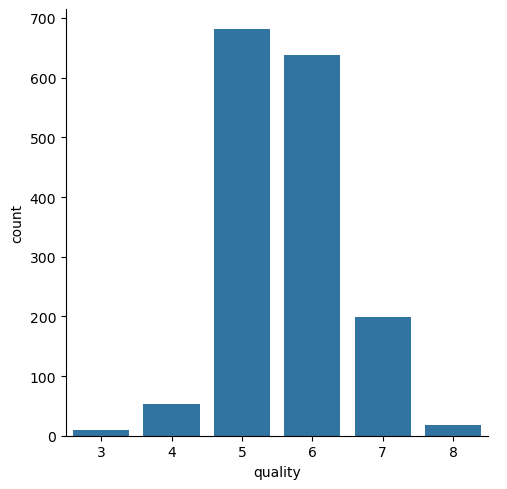

In [273]:
sns.catplot(x='quality', data= wine_qua, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

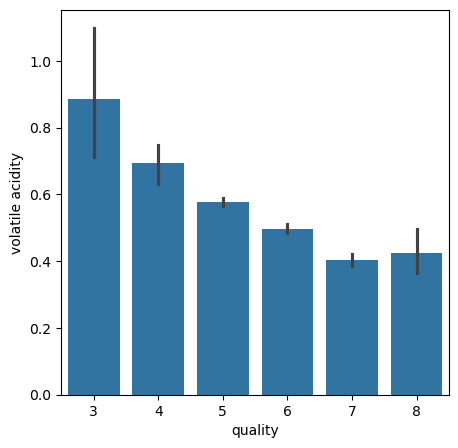

In [274]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine_qua)

<Axes: xlabel='quality', ylabel='citric acid'>

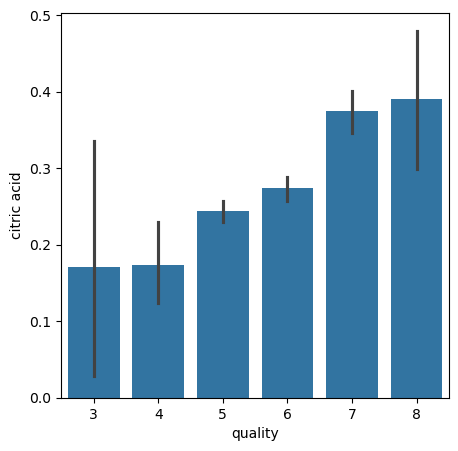

In [276]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=wine_qua)

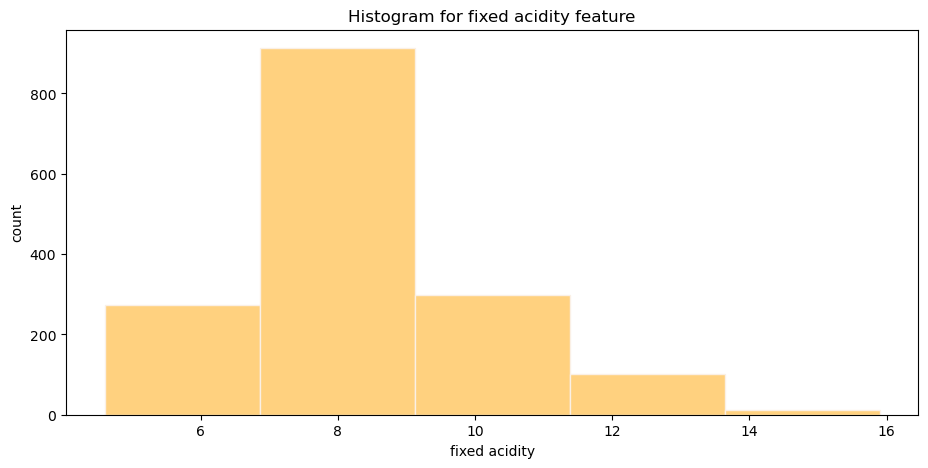

In [277]:
plt.figure(figsize=(11,5))
sns.histplot(data=wine_qua, x='fixed acidity', color='orange', edgecolor= 'linen',alpha=0.5, bins=5)
plt.title("Histogram for fixed acidity feature")
plt.xlabel('fixed acidity')
plt.ylabel('count')
plt.show()

In [279]:
wine_qua.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

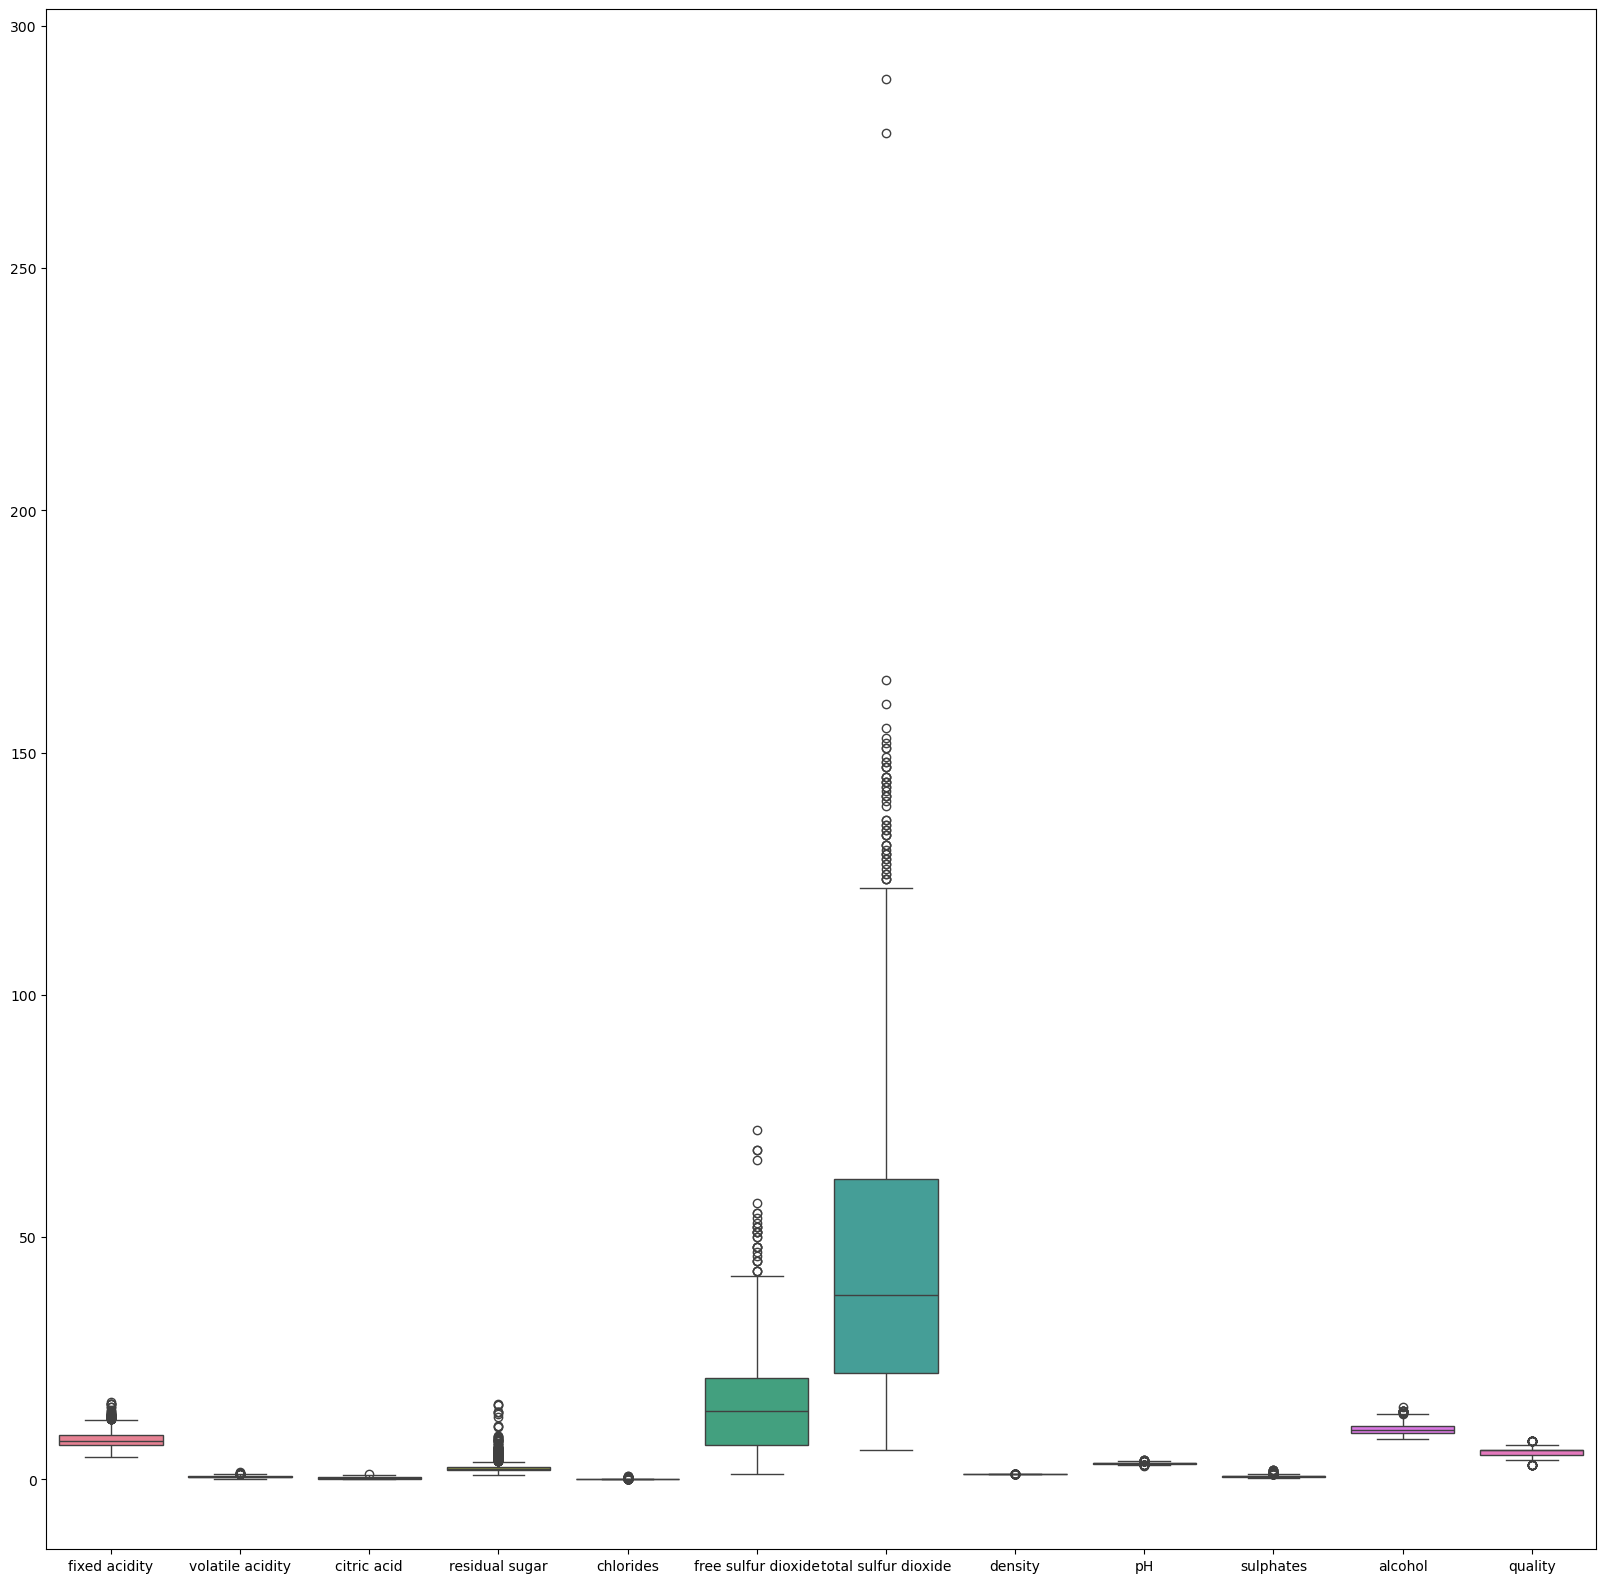

In [281]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=wine_qua,ax=ax)

In [282]:
Q1= wine_qua.quantile(0.25)
Q3=wine_qua.quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR
mask = ~((wine_qua<lower_bound)|(wine_qua>upper_bound)).any(axis=1)
clean_data = wine_qua[mask]

<Axes: >

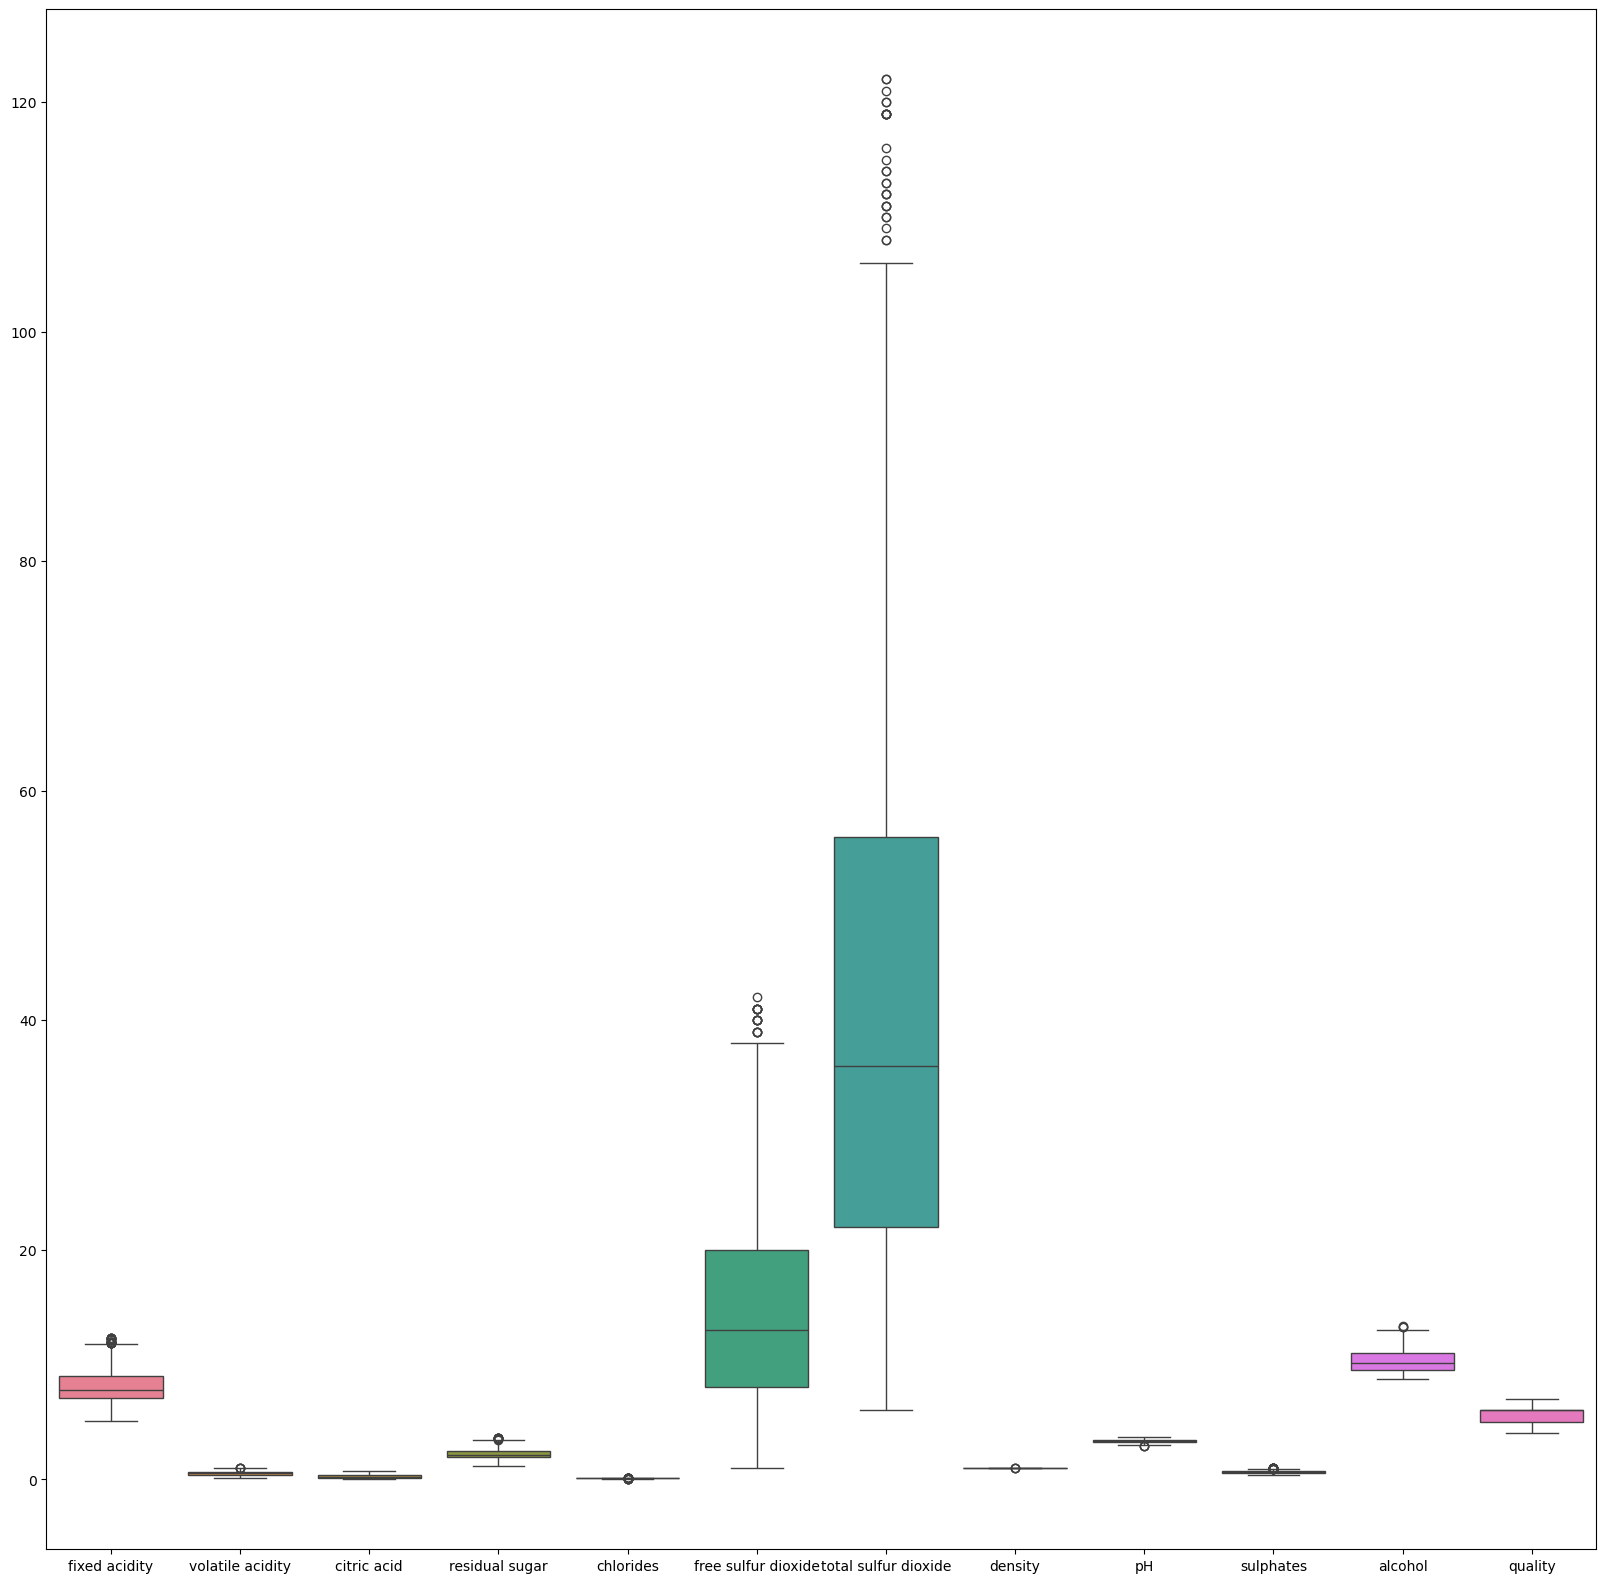

In [287]:
fig, ax= plt.subplots(figsize=(20,20))
sns.boxplot(clean_data,ax=ax)

In [288]:
clean_data['quality'].value_counts()

quality
5    513
6    498
7    135
4     33
Name: count, dtype: int64

In [291]:
clean_data.shape

(1179, 12)

In [293]:
correlation = clean_data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.271010,0.659397,0.229653,0.197774,-0.150845,-0.087083,0.610125,-0.684378,0.165367,-0.037999,0.113422
volatile acidity,-0.271010,1.000000,-0.627194,0.035215,0.117805,-0.016718,0.097487,0.044174,0.220702,-0.317346,-0.220600,-0.346962
citric acid,0.659397,-0.627194,1.000000,0.149494,0.073031,-0.068852,0.004660,0.305458,-0.470286,0.256747,0.137762,0.212133
residual sugar,0.229653,0.035215,0.149494,1.000000,0.232752,0.088405,0.199534,0.394732,-0.054684,0.040172,0.098175,0.007934
chlorides,0.197774,0.117805,0.073031,0.232752,1.000000,0.012326,0.176938,0.411902,-0.175758,-0.076853,-0.300750,-0.190869
free sulfur dioxide,-0.150845,-0.016718,-0.068852,0.088405,0.012326,1.000000,0.619675,-0.021505,0.149126,0.107455,-0.022415,-0.003609
total sulfur dioxide,-0.087083,0.097487,0.004660,0.199534,0.176938,0.619675,1.000000,0.149847,0.010031,-0.049655,-0.245125,-0.203374
density,0.610125,0.044174,0.305458,0.394732,0.411902,-0.021505,0.149847,1.000000,-0.227471,0.081691,-0.538901,-0.215375
pH,-0.684378,0.220702,-0.470286,-0.054684,-0.175758,0.149126,0.010031,-0.227471,1.000000,0.013972,0.126747,-0.060288
sulphates,0.165367,-0.317346,0.256747,0.040172,-0.076853,0.107455,-0.049655,0.081691,0.013972,1.000000,0.260783,0.413533


<Axes: >

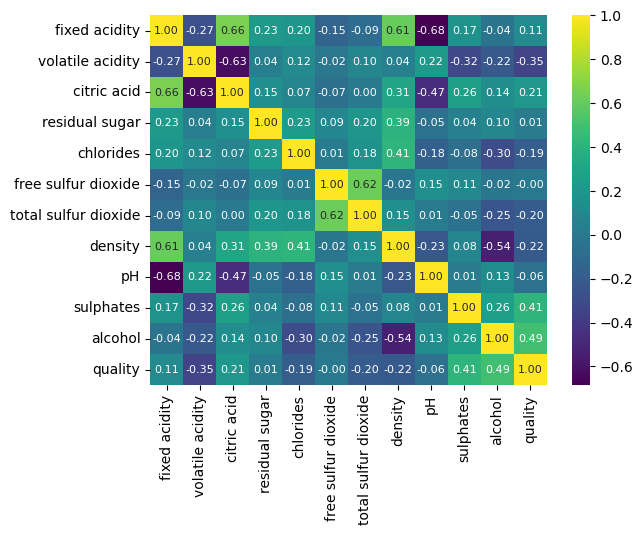

In [295]:
sns.heatmap(correlation, cbar=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap='viridis')

In [296]:
x = clean_data.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [297]:
y = clean_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1179, dtype: int64

In [301]:
clean_data['quality'] = clean_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

C:\Users\GAYATHRI\AppData\Local\Temp\ipykernel_4460\1365217123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['quality'] = clean_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)


In [303]:
clean_data['quality'].value_counts()

quality
0    1044
1     135
Name: count, dtype: int64

In [215]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)


In [217]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=2)

In [209]:
x_resampled.shape,y_resampled.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2088, 11), (2088,), (1670, 11), (418, 11), (1670,), (418,))

In [193]:
model = RandomForestClassifier()

In [195]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [196]:
training_data_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(training_data_predict,y_train)
print('accuracy of training data:', training_data_accuracy)
      

accuracy of training data: 1.0


In [199]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = accuracy_score(testing_data_predict,y_test)
print('accuracy of testing data:', testing_data_accuracy)

accuracy of testing data: 0.930622009569378


In [201]:
cm = confusion_matrix(testing_data_predict,y_test)
print(cm)

[[163   7]
 [ 22 226]]


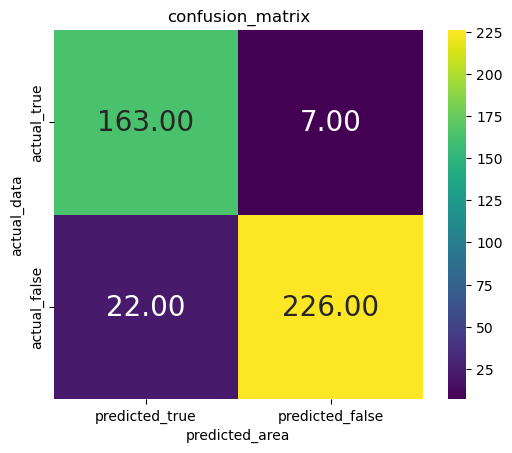

In [203]:
sns.heatmap(cm,annot= True, annot_kws= {'size':20}, fmt = '.2f', cmap = 'viridis', square = True,
            xticklabels = ['predicted_true','predicted_false'],
            yticklabels = ['actual_true','actual_false'])
plt.xlabel('predicted_area')
plt.ylabel('actual_data')
plt.title('confusion_matrix')
plt.show()


In [205]:
print(classification_report(testing_data_predict,y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       170
           1       0.97      0.91      0.94       248

    accuracy                           0.93       418
   macro avg       0.93      0.94      0.93       418
weighted avg       0.93      0.93      0.93       418



In [207]:
input_data =(11.2,	0.280,	0.56,	1.9,	0.075,	17.0,	60.0,	0.99800,	3.16,	0.58,	9.8)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('quality of wine',prediction[0])
if (prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')
    

quality of wine 0
Bad quality wine


C:\Users\GAYATHRI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
